In [56]:
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import helper
import torch.nn.functional as F

In [57]:
#Helper functions
def activation(x):
    return 1/(1+torch.exp(-x))

def softmax(input):
    return torch.exp(input)/torch.sum(torch.exp(input), dim=1).view(-1, 1)

In [58]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [59]:
#Testing input parameters
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [60]:
#Displaying a sample image

#plt.imshow(images[-1].numpy().squeeze())
#print(images.shape)

In [61]:
#Creating neural network (but not used later)
inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1) #64 x 256

output = torch.mm(h, w2) + b2 #64x10
softmax_output = softmax(output)

In [62]:
#Creating another model (but not used later)
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
print(images.shape)

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

torch.Size([64, 1, 28, 28])
tensor(2.3243, grad_fn=<NllLossBackward>)


In [63]:
#Creating the model to be used
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        #Forward pass
        logits = model.forward(images)
        #Compute loss
        loss = criterion(logits, labels)
        running_loss += loss
        #Compute gradient
        loss.backward()
        #Update weights using gradient
        optimizer.step()
    
    print("Training loss : ", running_loss/len(trainloader))

Training loss :  tensor(1.0010, grad_fn=<DivBackward0>)
Training loss :  tensor(0.3747, grad_fn=<DivBackward0>)
Training loss :  tensor(0.3179, grad_fn=<DivBackward0>)
Training loss :  tensor(0.2876, grad_fn=<DivBackward0>)
Training loss :  tensor(0.2629, grad_fn=<DivBackward0>)


tensor(1)


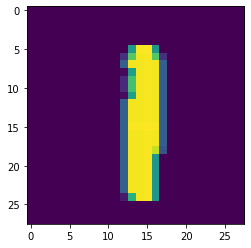

In [55]:
#Testing the predictions

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)

plt.imshow(img.view(1,28,28).numpy().squeeze())
print(np.argmax(ps))